In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"../data/marketingcampaigns.csv", sep=',', on_bad_lines='skip')

In [3]:
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1027,No revenue campaign,2023-02-01,2023-08-01,20000,0.30,social media,B2B,organic,0.50,NaN
1028,Random mess,2023-06-06,NaN,100000,NaN,podcast,NaN,referral,NaN,300000.00
1029,Invalid budget,2022-12-01,2023-06-01,abc,NaN,email,B2C,promotion,0.20,50000.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000,0.60,webinar,B2B,paid,0.70,90000.00


In [4]:
df.info

<bound method DataFrame.info of                                       campaign_name  start_date    end_date  \
0               Public-key multi-tasking throughput  2023-04-01  2024-02-23   
1                De-engineered analyzing task-force  2023-02-15  2024-04-22   
2     Balanced solution-oriented Local Area Network  2022-12-20  2023-10-11   
3                 Distributed real-time methodology  2022-09-26  2023-09-27   
4               Front-line executive infrastructure  2023-07-07  2024-05-15   
...                                             ...         ...         ...   
1027                            No revenue campaign  2023-02-01  2023-08-01   
1028                                    Random mess  2023-06-06         NaN   
1029                                 Invalid budget  2022-12-01  2023-06-01   
1030                              Overlapping dates  2023-03-01  2022-12-31   
1031                           Too many conversions  2023-05-01  2023-11-01   

        budget   ro

In [5]:
df.head(2)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10


In [6]:
df.shape #filas y columnas

(1032, 10)

In [7]:
df.columns #columnas

Index(['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type',
       'target_audience', 'channel', 'conversion_rate', 'revenue'],
      dtype='object')

In [8]:
df.isnull().sum() #suma de los valores nulos por columna

campaign_name      0
start_date         1
end_date           2
budget             3
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [9]:
df.isnull().sum() / len(df) * 100    #proporcion de los valores nulos por columna

campaign_name      0.000000
start_date         0.096899
end_date           0.193798
budget             0.290698
roi                0.387597
type               0.096899
target_audience    0.193798
channel            0.096899
conversion_rate    0.387597
revenue            0.290698
dtype: float64

In [10]:
df.duplicated() #verifica si hay filas duplicadas

0       False
1       False
2       False
3       False
4       False
        ...  
1027    False
1028    False
1029    False
1030    False
1031    False
Length: 1032, dtype: bool

In [11]:
df.duplicated().sum() #suma de los valores duplicados por fila

np.int64(15)

In [12]:
df = df.drop_duplicates() #elimina filas duplicadas

In [13]:
df.duplicated().sum() #suma de los valores duplicados por fila

np.int64(0)

<Axes: >

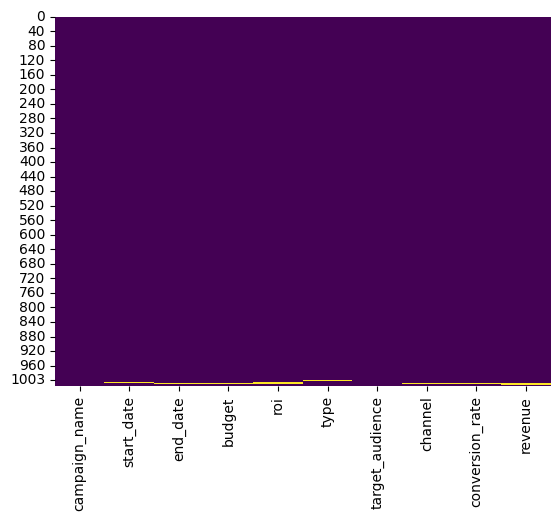

In [14]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #grafica de los valores nulos

In [15]:
df['start_date'].isnull().sum() #verifico que ya no hay valores nulos en el dataframe 

np.int64(1)

In [16]:
df['end_date'].isnull().sum()

np.int64(2)

In [17]:

# Find rows with null values in any column
null_rows = df[df.isnull().any(axis=1)]
print(f"Number of rows with null values: {len(null_rows)}")
 
# To see which specific rows have nulls in 'start_date' column
start_date_nulls = df[df['start_date'].isnull()]
print(f"\nNumber of rows with null values in 'start_date': {len(start_date_nulls)}")
 
# Display those rows
if not start_date_nulls.empty:
    print("\nRows with null values in 'start_date':")
    display(start_date_nulls)
# Convert date columns to datetime
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
 
# Calculate campaign duration for rows where both dates are available
valid_dates = df.dropna(subset=['start_date', 'end_date'])
campaign_lengths = (valid_dates['end_date'] - valid_dates['start_date']).dt.days
 
# Calculate median campaign length
median_length = campaign_lengths.median()
print(f"Median campaign length: {median_length} days")
 
# Fill missing start_dates where end_date is available
mask_missing_start = df['start_date'].isna() & df['end_date'].notna()
df.loc[mask_missing_start, 'start_date'] = df.loc[mask_missing_start, 'end_date'] - pd.Timedelta(days=median_length)
 
# Fill missing end_dates where start_date is available
mask_missing_end = df['start_date'].notna() & df['end_date'].isna()
df.loc[mask_missing_end, 'end_date'] = df.loc[mask_missing_end, 'start_date'] + pd.Timedelta(days=median_length)
 
# Check remaining missing values after filling
print("\nRemaining missing values after filling:")
print(df[['start_date', 'end_date']].isna().sum())
 
# Display rows that had dates filled
print("\nRows with filled dates:")
display(df.loc[null_rows.index])
 
# Check rows where both dates are missing
both_dates_missing = df[(df['start_date'].isna()) & (df['end_date'].isna())]
 
print(f"Number of rows where both start_date and end_date are missing: {len(both_dates_missing)}")
 
# Drop rows where both dates are missing
rows_before = len(df)
df = df.dropna(subset=['start_date', 'end_date'], how='all')
rows_after = len(df)
 
print(f"\nDropped {rows_before - rows_after} rows where both dates were missing")
print(f"DataFrame shape after dropping: {df.shape}")
 
# Verify no rows have both dates missing
both_dates_missing_after = df[(df['start_date'].isna()) & (df['end_date'].isna())]
print(f"\nRemaining rows with both dates missing: {len(both_dates_missing_after)}")
 


Number of rows with null values: 11

Number of rows with null values in 'start_date': 1

Rows with null values in 'start_date':


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1021,Cloud-based scalable solution,NaN,2023-12-31,50000,NaN,event,B2C,paid,0.3,120000.0


Median campaign length: 364.0 days

Remaining missing values after filling:
start_date    1
end_date      1
dtype: int64

Rows with filled dates:


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1003,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,NaN,0.59,social media,B2C,referral,0.67,558302.11
1004,User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.40,NaN,B2C,promotion,0.52,206241.46
1005,NEW CAMPAIGN - Missing Budget,2023-10-01,2024-01-15,NaN,0.25,email,B2B,organic,NaN,45000.00
1021,Cloud-based scalable solution,2023-01-01,2023-12-31,50000,NaN,event,B2C,paid,0.30,120000.00
1022,Broken-date campaign,2023-01-02,2024-01-01,25000,0.45,email,B2B,organic,NaN,87500.00
1023,Negative ROI test,2022-10-10,2023-05-05,-10000,-0.20,podcast,B2C,referral,0.10,NaN
1024,Null-heavy campaign,2023-01-01,2023-12-31,NaN,NaN,B2B,social media,NaN,NaN,NaN
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000,0.25,email,NaN,paid,0.40,45000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000,0.30,social media,B2B,organic,0.50,NaN
1028,Random mess,2023-06-06,2024-06-04,100000,NaN,podcast,NaN,referral,NaN,300000.00


Number of rows where both start_date and end_date are missing: 1

Dropped 1 rows where both dates were missing
DataFrame shape after dropping: (1016, 10)

Remaining rows with both dates missing: 0


In [18]:
df['start_date'].isnull().sum()

np.int64(0)

In [19]:
df['end_date'].isnull().sum()

np.int64(0)

In [20]:
#recurrimos al método KNN para ser más precisos en la imputación de los valores nulos en las columnas roi, conversion_rate y revenue
from sklearn.impute import KNNImputer
 
# Columnas que necesitas imputación
numerical_columns = ['roi', 'conversion_rate', 'revenue']
 
# Crear KNN imputer
imputer = KNNImputer(n_neighbors=5)
 
# Trasnformación
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])
 
# Comprobación
print("Porcentaje de nulos después de la imputación:")
print(df[numerical_columns].isnull().sum() / df.shape[0] * 100)
 
# Mostrar los datos
df[numerical_columns].head()

Porcentaje de nulos después de la imputación:
roi                0.0
conversion_rate    0.0
revenue            0.0
dtype: float64


,roi,conversion_rate,revenue
0,0.35,0.40,709593.48
1,0.74,0.66,516609.10
2,0.37,0.28,458227.42
3,0.47,0.19,89958.73
4,0.30,0.81,47511.35


In [21]:
# Ver el tipo de datos de la columna 'type'
tipo_type = df['type'].dtype
print(f'Type es: {tipo_type}')
tipo_target_audience = df['target_audience'].dtype
print(f'Target_audience es: {tipo_target_audience}')

Type es: object
Target_audience es: object


In [22]:
print(df.dtypes)

campaign_name              object
start_date         datetime64[ns]
end_date           datetime64[ns]
budget                     object
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object


In [ ]:
#calcular media de columnas numericas
# Forzar conversión a numérico ignorando errores
columnas_numericas = ['budget']
for col in columnas_numericas:
  df[col] = pd.to_numeric(df[col], errors='coerce')  # convierte strings a NaN si no se puede

In [23]:
df.isnull().sum() #verifico que ya no hay valores nulos en el dataframe limpio

campaign_name      0
start_date         0
end_date           0
budget             3
roi                0
type               1
target_audience    2
channel            1
conversion_rate    0
revenue            0
dtype: int64

In [24]:
df.isnull().sum() / len(df) * 100

campaign_name      0.000000
start_date         0.000000
end_date           0.000000
budget             0.295276
roi                0.000000
type               0.098425
target_audience    0.196850
channel            0.098425
conversion_rate    0.000000
revenue            0.000000
dtype: float64

<Axes: >

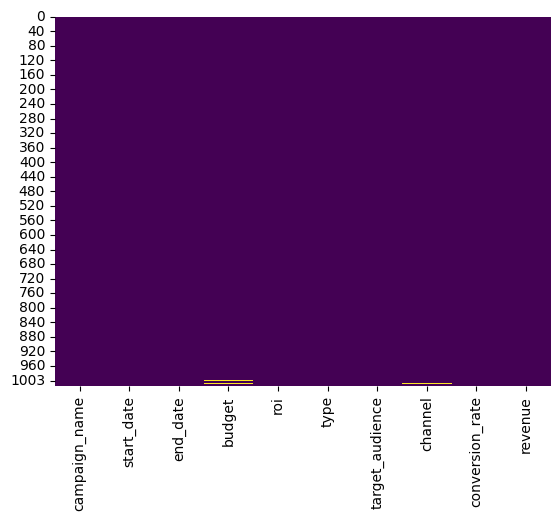

In [25]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #grafica de los valores nulos

In [26]:
print(df.columns.tolist())


['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type', 'target_audience', 'channel', 'conversion_rate', 'revenue']


In [27]:
df.columns = df.columns.str.strip() # Elimina espacios en blanco al inicio y al final de los nombres de las columnas

In [28]:
print(df.columns.tolist())

['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type', 'target_audience', 'channel', 'conversion_rate', 'revenue']


In [29]:
# sin tratar de separarlo en columnas.
with open(r"..\data\marketingcampaigns.csv", encoding='utf-8') as f:
    for i in range(10):
        print(f.readline())

campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue

Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.4,709593.48

De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.1

Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42

Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73

Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.3,social media,B2B,promotion,0.81,47511.35

Upgradable transitional data-warehouse,2023-06-29,2023-12-13,75569.28,0.59,social media,B2C,referral,0.67,558302.11

Innovative context-sensitive framework,2023-03-01,2024-02-23,28964.45,0.59,email,B2C,referral,0.17,172882.59

User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.4,webinar,B2C,promotion,0.52,206241.46

Proactive neutral me

In [30]:
columnas_numericas = ['budget', 'roi', 'conversion_rate', 'revenue']

for col in columnas_numericas:
    if col in df.columns:
        print(f"✅ '{col}' está presente.")
    else:
        print(f"❌ '{col}' NO está en el DataFrame.")



✅ 'budget' está presente.
✅ 'roi' está presente.
✅ 'conversion_rate' está presente.
✅ 'revenue' está presente.


In [31]:
df['roi'] #una columna

0       0.350
1       0.740
2       0.370
3       0.470
4       0.300
        ...  
1027    0.300
1028    0.538
1029    0.402
1030    0.600
1031    0.800
Name: roi, Length: 1016, dtype: float64

In [32]:
#como arreglo los valores nulos sin cargarnos los datos originales
df_limpio = df.copy() #copia del dataframe original

In [33]:
df_limpio.head(3) #verifico que la copia se haya hecho bien

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42


In [34]:
df_limpio.isnull().sum() #verifico que ya no hay valores nulos en el dataframe limpio

campaign_name      0
start_date         0
end_date           0
budget             3
roi                0
type               1
target_audience    2
channel            1
conversion_rate    0
revenue            0
dtype: int64

In [35]:
df_limpio.duplicated().sum() #suma de los valores duplicados por fila

np.int64(0)

In [36]:
df_limpio

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.350,email,B2B,organic,0.400,709593.480
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.740,email,B2C,promotion,0.660,516609.100
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.370,podcast,B2B,paid,0.280,458227.420
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.470,webinar,B2B,organic,0.190,89958.730
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.300,social media,B2B,promotion,0.810,47511.350
...,...,...,...,...,...,...,...,...,...,...
1027,No revenue campaign,2023-02-01,2023-08-01,20000,0.300,social media,B2B,organic,0.500,292565.718
1028,Random mess,2023-06-06,2024-06-04,100000,0.538,podcast,NaN,referral,0.596,300000.000
1029,Invalid budget,2022-12-01,2023-06-01,abc,0.402,email,B2C,promotion,0.200,50000.000
1030,Overlapping dates,2023-03-01,2022-12-31,60000,0.600,webinar,B2B,paid,0.700,90000.000


In [37]:
df_limpio.to_csv(r'../data/marketingcampaigns_limpio.csv',index=False) #guardo el dataframe limpio en un nuevo archivo csv